In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Data Preprocessing

loaded dataset into df dataframe for analysis

In [3]:
df.shape

(158, 12)

There are 158 rows and 12 columns in dataset

In [4]:
df.isnull().sum() # checking the null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there is no null value in any of the column

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


using describe found that all cols data are equal length

In [6]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There is little skewness in standard Error, Family, Trust adn Generosity

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

we can see there are two categorical data 'Region' and 'Country'
this is creating problem in removing outliers, these columns also important to predict 
the happiness score.
moreover the 'Happiness Rank' is only index of country 
so we can remove these three columns

In [8]:
df.drop(['Happiness Rank','Country','Region'],inplace=True,axis=1)

Dropped three columns`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


# Feature Analysis

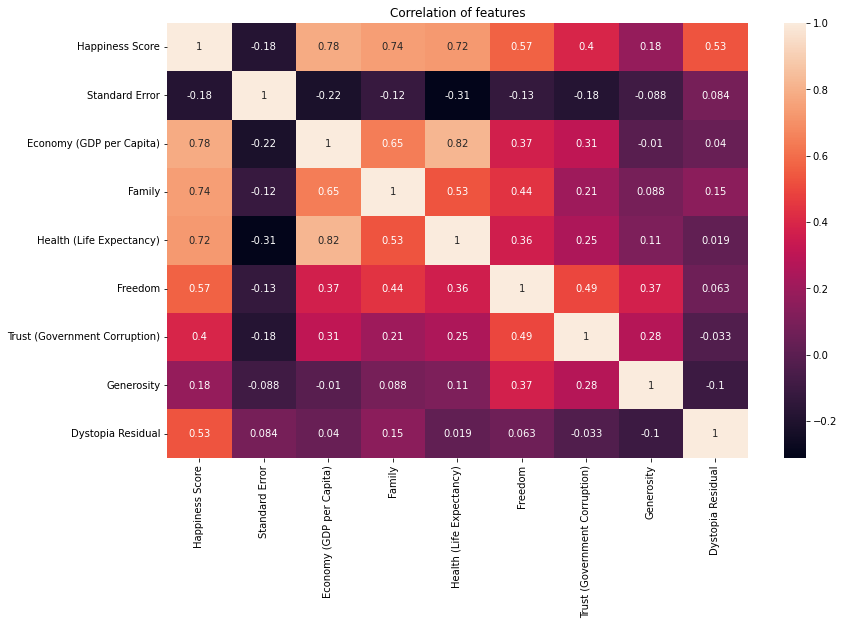

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),color='Blue',annot=True)
plt.title('Correlation of features')
plt.show()

Standard Error has negetige correlation with Happiness Score, Generosity has very less correlation with target, moreover Economy,Family, Health has more correlation with Happiness Score

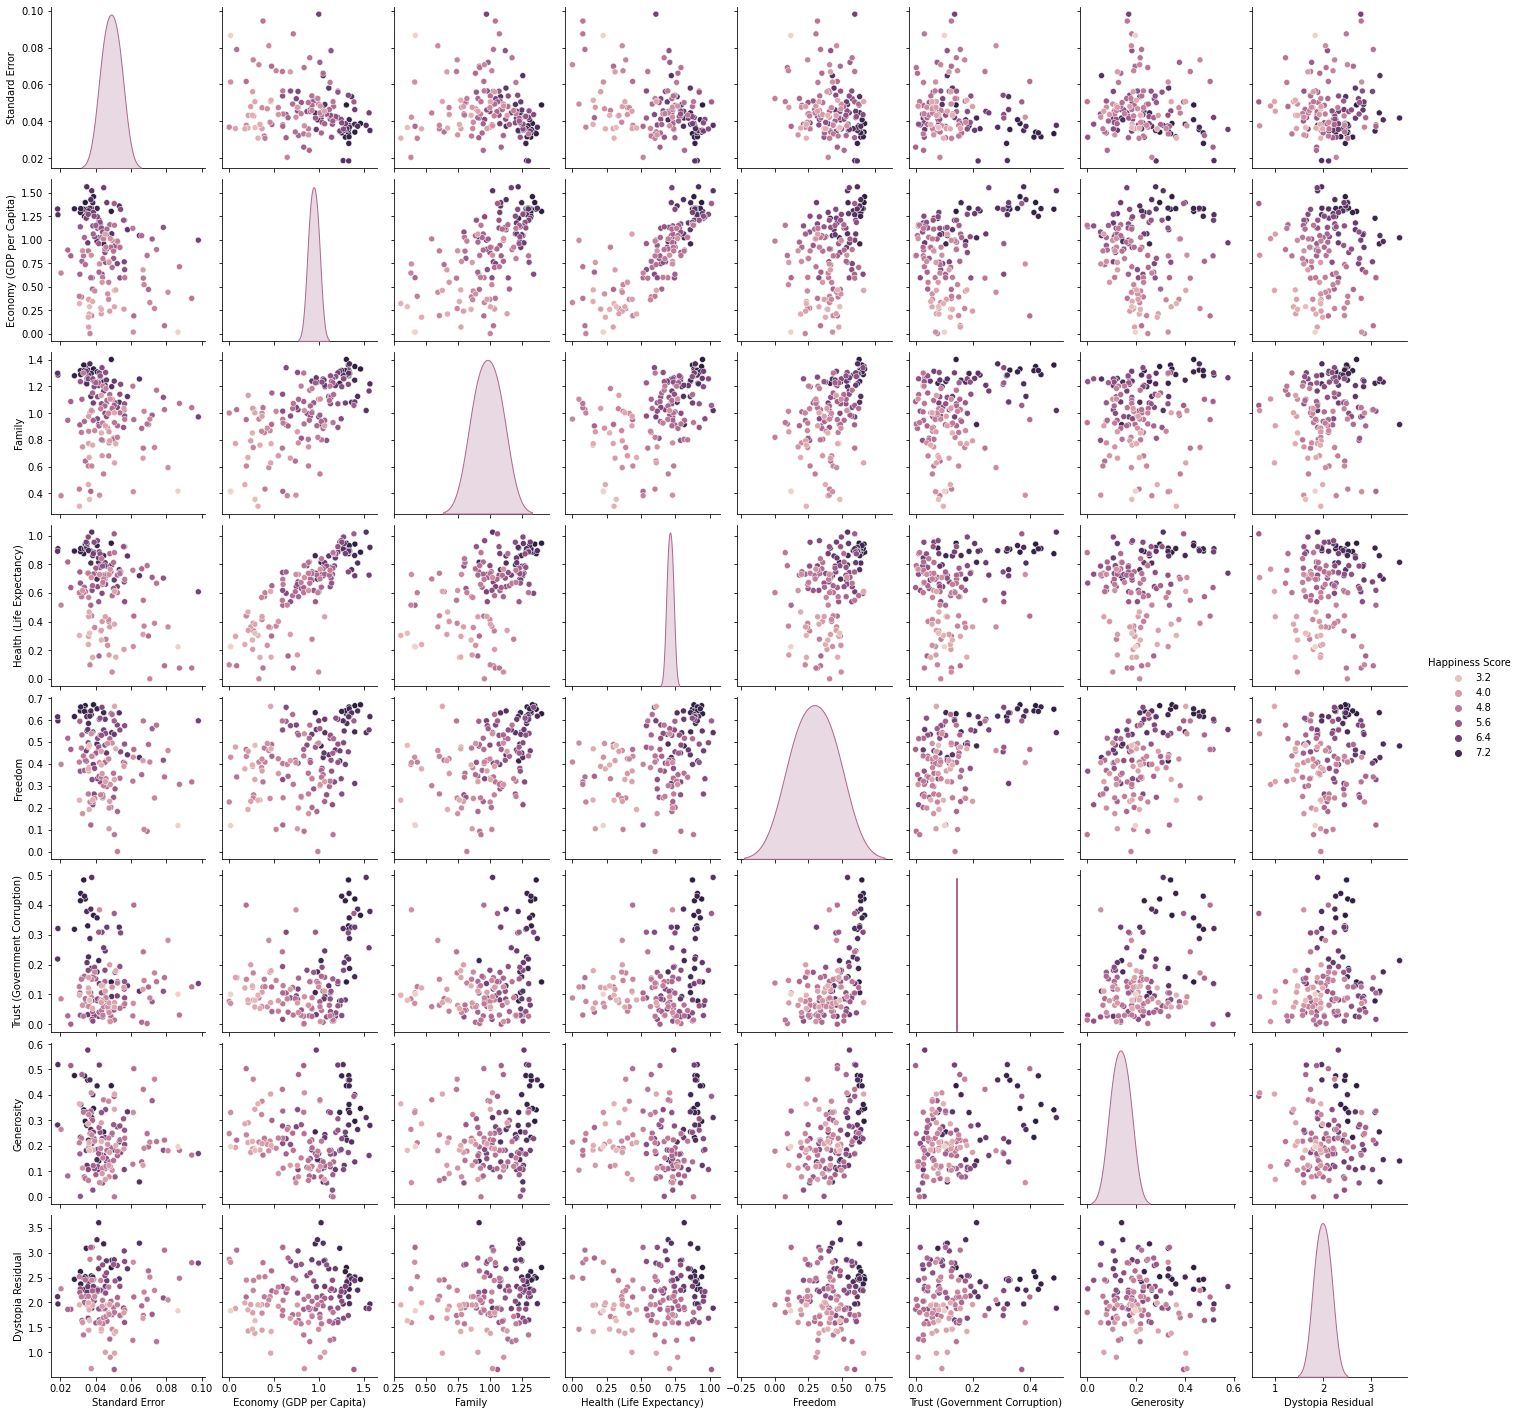

In [40]:
sns.pairplot(df, hue="Happiness Score")

Found all columns are in number

Happiness Score                     AxesSubplot(0.125,0.536818;0.133621x0.343182)
Standard Error                   AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Economy (GDP per Capita)          AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Health (Life Expectancy)         AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Freedom                                AxesSubplot(0.125,0.125;0.133621x0.343182)
Trust (Government Corruption)       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Generosity                           AxesSubplot(0.44569,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

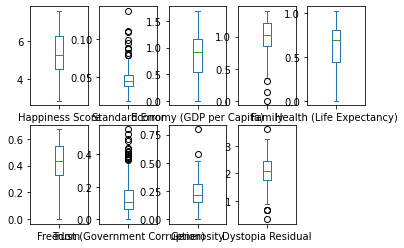

In [11]:
df.plot(kind='box',subplots=True,layout=(2,5))

We can see the outliers are present in few columns now we have to remove it

In [12]:
z=np.abs(zscore(df))
z

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


The above output shows the zscore of each data, 

In [13]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


We found some data which are out of 3 thresold value

In [14]:
df=df[(z<3).all(axis=1)]

new dataframe created removing the outliers (>3 zscore)

In [15]:
df.shape

(149, 9)

Checking the shape of dataset after removing the outliers

In [16]:
a=(158-149)/158
a

0.056962025316455694

So there lost of 5 Percentage data loss in removing the outliers which is neglectable

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

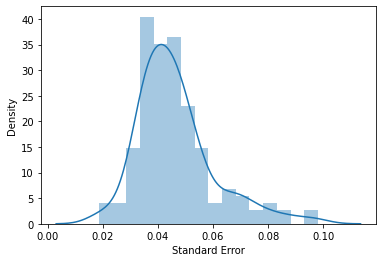

In [17]:
sns.distplot(df['Standard Error'])

Checking the sitribution of Standard Error

found Standard Error column is sligjtly left skewed

<AxesSubplot:xlabel='Family', ylabel='Density'>

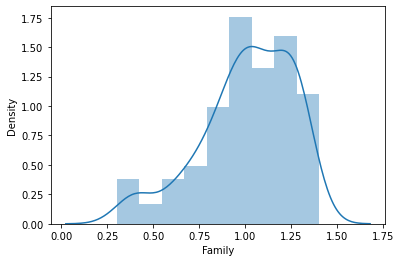

In [18]:
sns.distplot(df['Family'])

found Family column is slightly right skewed

<AxesSubplot:ylabel='Count'>

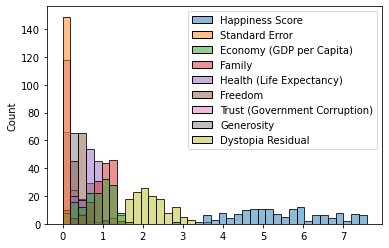

In [19]:
sns.histplot(df) # checking the requirement of scaling 

found that there is much difference between the magnitude of data so we need to scale the data 

In [20]:
# removing the target column before applying the scalling 
x=df.drop('Happiness Score',axis=1)

removed the target column

In [21]:
x.shape

(149, 8)

checking the shape of new x dataframe

In [22]:
y=df['Happiness Score']

setting the target columns as y

In [23]:
y.shape # checking the equality of x and y

(149,)

In [24]:
#now we apply the scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.196283,0.892961,0.952046,0.918244,0.993789,0.853038,0.514975,0.632017
1,0.381263,0.832733,1.000000,0.924496,0.938841,0.287442,0.757071,0.694649
2,0.185860,0.847542,0.962115,0.853099,0.969615,0.982666,0.592382,0.623420
3,0.255180,0.932918,0.935163,0.863409,1.000000,0.741780,0.602100,0.614353
4,0.214115,0.848060,0.927577,0.883326,0.945112,0.669722,0.794916,0.609756


after applying the scaling on features we get values between 0-1

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

spliting the data into train and test dataset 

In [26]:
x_train.shape # checking the x_train length

(99, 8)

In [27]:
x_test.shape # checking the x_test length

(50, 8)

In [28]:
y_train.shape # checking the y_train length

(99,)

In [29]:
y_test.shape # checking the x_test length

(50,)

Now we have to apply the Machine Learning Model as the data in the data set 
are continous nature so we go for regression model

# Applying ML Model 

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Accuray of the Model",lr.score(x_train,y_train) )

Accuray of the Model 0.99999993543426


We have trained the regression model with the training sets and the accuracy score we got 99%

In [31]:
lr.coef_ # the coefficient of the regression model 

array([-5.22005553e-05,  1.56415783e+00,  1.09926622e+00,  1.02498794e+00,
        6.69491166e-01,  4.92139675e-01,  5.76257785e-01,  2.94775099e+00])

In [32]:
lr.intercept_ # the interception of the regression model

0.9574497229161247

In [33]:
y_pred=lr.predict(x_test)
y_pred

array([5.28629113, 6.93729892, 4.5122926 , 5.19231664, 5.21200258,
       6.47668671, 5.60464585, 3.78084155, 5.47384964, 5.12417951,
       4.64236981, 7.19974374, 6.29811749, 7.28393457, 6.90134101,
       5.81252756, 3.90381076, 5.42859902, 5.82407879, 4.03312656,
       6.5050129 , 4.33221052, 6.66959544, 4.25203796, 4.21854617,
       3.65518152, 4.63348567, 4.78791965, 5.9751945 , 6.48507063,
       6.81013847, 6.98249722, 5.5885958 , 7.22557655, 5.99506102,
       4.69399405, 5.85520387, 6.5750196 , 7.42681862, 6.45456932,
       4.41928933, 5.09760405, 5.07327856, 6.94620312, 7.27758774,
       5.12886569, 3.9948474 , 3.66729886, 5.25281766, 4.67739069])

predicting the target value y using the trained regression model lr where the input featues are data from x_test

In [34]:
y_test.sort_index() # p`rinting the predicted value of the test data

4      7.427
9      7.284
10     7.278
11     7.226
12     7.200
15     6.983
16     6.946
18     6.937
19     6.901
22     6.810
26     6.670
28     6.575
30     6.505
31     6.485
32     6.477
33     6.455
37     6.298
44     5.995
47     5.975
53     5.855
57     5.824
58     5.813
67     5.605
68     5.589
71     5.474
72     5.429
76     5.286
78     5.253
79     5.212
81     5.192
84     5.129
85     5.124
88     5.098
89     5.073
104    4.788
108    4.694
111    4.677
112    4.642
113    4.633
121    4.512
124    4.419
127    4.332
132    4.252
133    4.218
136    4.033
137    3.995
141    3.904
145    3.781
148    3.667
150    3.655
Name: Happiness Score, dtype: float64

In [35]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_rmse=np.sqrt(lr_mse)
print("MSE for LR:",lr_mse)
print("RMSE for LR:",lr_rmse)

MSE for LR: 7.985773490502088e-08
RMSE for LR: 0.00028259110903392003


In [36]:
# another regression model SVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    svr.score(x_train,y_train)
    pred=svr.predict(x_test)
    print("Accuracy :",r2_score(y_test,pred))
    svr_mse=mean_squared_error(y_test,svr.predict(x_test))
    svr_rmse=np.sqrt(svr_mse)
    print("MSE for SVR:",svr_mse)
    print("RMSE for SVR:",svr_rmse)

Accuracy : 0.9964446497186846
MSE for SVR: 0.004357556657889099
RMSE for SVR: 0.0660117918094116
Accuracy : 0.9501614024135187
MSE for SVR: 0.06108385828371254
RMSE for SVR: 0.2471514885322614
Accuracy : 0.9772273870139803
MSE for SVR: 0.027910878952283794
RMSE for SVR: 0.16706549300284543


after using the Support Vector Regressor as model we get the accuracy of 98%

In [37]:
# another regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#x_train, y_train = make_regression(n_features=4, n_informative=2,
                        #random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=100)
regr.fit(x_train, y_train)
#rfr=RandomForestRegressor(n_estimators =100)
#rfr.fit(x_train,y_train)
print("Accuracy of RFR:",regr.score(x_train,y_train))

Accuracy of RFR: 0.9744208799442867


In [38]:
regr_mse=mean_squared_error(y_test,regr.predict(x_test))
regr_rmse=np.sqrt(regr_mse)
print("MSE for RFR:",regr_mse)
print("RMSE for RFR:",regr_rmse)

MSE for RFR: 0.14609721854194446
RMSE for RFR: 0.38222665859662963


Linear Regression Accuracy - 99% MSE - 7.9
Support Vector Regression - 99% MSE- 0.00 (With Linear Kernel)
Random Forest Regressor - 97% MSE- 0.14


# So we can see Support vector Machine is the best fit ML Model for this dataset 

# Saving the model

In [39]:
import pickle
filename='Happiness_score.pkl'
pickle.dump(lr,open('Happiness_score.pkl','wb'))

Dumping the model